## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

**Q0.**
1. What is the difference between regression and classification?

Regression predicts numerical values, and classification predicts categories. Regression tries to unfold the relationship of variables to predict a specific value, and it has a line of best fit that shows this relationship. Classification is about creating groups or clusters based off variables.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table is a cross tabulation of predicted and actual values. We can use the table to compare predicted values and true values, and by looking at the values like true negatives, true positives, false negatives, adn false positives, we can find patterns in the model's performance.  

3. What does the SSE quantify about a particular model?

The SSE is the sum of squared errors, and shows us how off the predictions are from the true values. We get this value by subtracting the distance of the predicted value from the true value and squaring it. If the SSE is really small, that means we have low error. Having a high error means the predicted values are far from the true value. 

4. What are overfitting and underfitting? 

Overfitting is when the model goes not generalize well to new data by being too complex, possibly being too specific or having too many variables. Underfitting is when the model is too simple to apply to test data and does not capture important trends. 

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

By splitting the data into training and testing sets, we can apply the results from the training to the test set, and thus can compare the predicted and true values. We need a test set because we can see the how SSE differs from training to testing data. Choosing a balanced k is important because a k that is too small would create too less clusters that is underfitted, whereas a k that is too large would create too many clusters, where differences wouldn't be meaningful and is overfitted.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

When reporting a class label, it is more straightforward as we directly get the result of each point. But a disadvantage of this is we don't see the confidence of the prediction, for example, the result could be 40% option A and 60% option B, but though these possibilities are somewhat close, we would only get that the result is option B without any background information. When reporting a class label through a probability distribution, we can see the bigger picture of where points lay, but we do not see the results of each specific point. 

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [41]:
df = pd.read_csv('../data/USA_cars_datasets.csv')

df = df[["price", "year", "mileage"]]

print(df.isna().sum()) # there is no Nas

print(df.shape) # there are 3 features and 2499 rows

print(df.head())

price      0
year       0
mileage    0
dtype: int64
(2499, 3)
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


In [42]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [43]:
y = df['price'] # Create target variable vector, predicting price
X = df.loc[:,['year','mileage']] # Create feature matrix, using year and mileage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=65)

In [44]:
print(X_test)

          year   mileage
2435  0.978723  0.034081
608   0.978723  0.015731
988   0.978723  0.011909
27    0.872340  0.030492
1438  0.978723  0.028227
...        ...       ...
1148  0.914894  0.022460
1179  0.978723  0.036519
2328  0.957447  0.043640
2074  0.893617  0.062932
359   0.744681  0.128321

[500 rows x 2 columns]


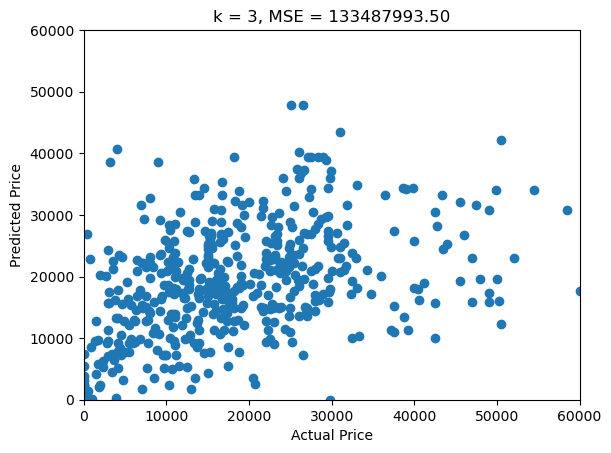

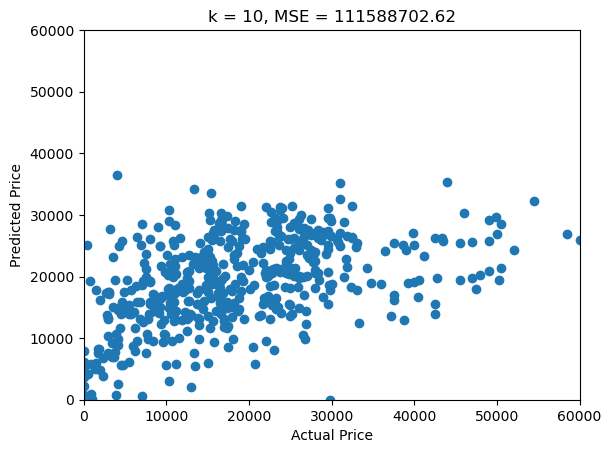

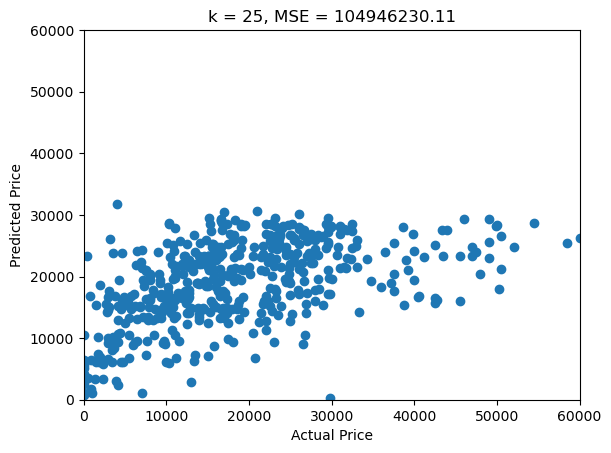

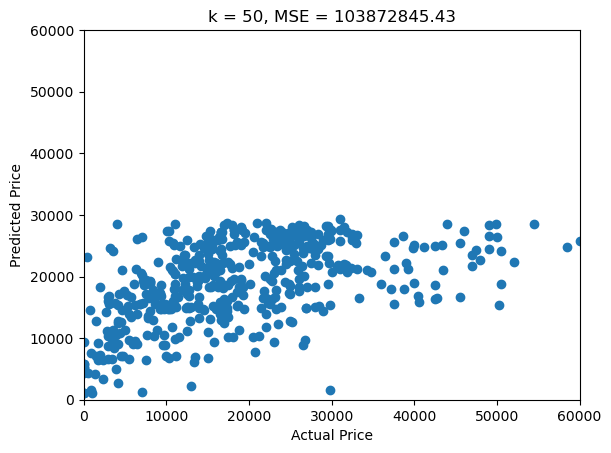

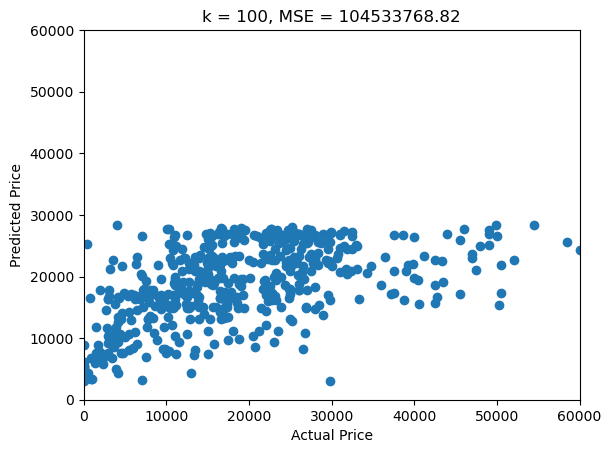

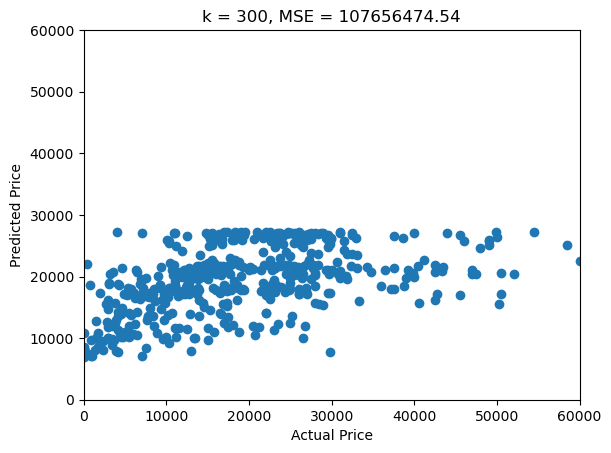

[133487993.49644443, 111588702.61873999, 104946230.110448, 103872845.4346808, 104533768.8152126, 107656474.53848925]


In [54]:
ks = [3, 10, 25, 50, 100, 300]
MSE = []


for each in ks:
    model = KNeighborsRegressor(n_neighbors=each)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    
    mse = np.sum( (y_test-y_hat)**2 )/X_test.shape[0]
    MSE.append(mse)

    plt.scatter(y_test, y_hat)
    plt.ylim(0, 60000)
    plt.xlim(0, 60000)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {each}, MSE = {mse:.2f}")
    plt.show()

print(MSE)

As the k increases, I noticed that the mean squared error decreased until k=50, and then increased again. This means that this elbow point is likely the best k value. From the scatter plot, I can see that as we increase k, the points slowly get more cluttered on the y-axis. This shows that because the k is so large, many test points are receiving the same predicted result. Also, because we plotted the predicted y value and the true y-value, if each point was predicted with 100% accuracy, we would see a straight diagonal line. 
1. Determine the optimal $k$ for these data.

The optimal k for this dataset would be 25 to 50. First, with these 2 k values, the mean squared error is low. Next, these k values take the optimal amount of neighbors to predict the price, based on mileage and year.

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

We can see that the first graph has the smallest k value, therefore it is the most dispersed graph; this shows overfit because the prediction is only based on the nearest 3 neighbors. This would make the prediction sensitive to noise and outliers, which explains the sparseness of predicted and actual points. For the graph with a large k value, like k=100, the predictions get smushed, and the predictions get closer and closer even though there are so many different cars. This shows underfit because we are looking at the closest 100 neighbors, which is high, causing us to miss the unique points and simplify the prediction based on more of average results. We can see this because as the k gets larger, the predicted values start to get closer and closer, showing that with a k too large, the predicted results become more and more similar.


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.